In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
result = {'2016':[219389, 0, 0],'2017' : [221979, 0, 0], '2018':[286281, 0, 0], '2019':[371297, 0, 0], 
          '2020':[401906, 0, 0], '2021' : [422000, 0, 0], '2022':[0,0,0]}

In [3]:
result

{'2016': [219389, 0, 0],
 '2017': [221979, 0, 0],
 '2018': [286281, 0, 0],
 '2019': [371297, 0, 0],
 '2020': [401906, 0, 0],
 '2021': [422000, 0, 0],
 '2022': [0, 0, 0]}

In [4]:
data = pd.read_csv('data/우리동네키움센터 .csv', encoding='cp949')
data1 = pd.read_csv('data/지역아동센터 시설현황정보 .csv', encoding='cp949')

In [5]:
data['설립일']

0      2022-03-21
1      2022-03-18
2      2022-03-16
3      2022-03-02
4      2022-03-02
          ...    
202    2019-10-01
203    2019-06-08
204    2019-09-01
205    2019-08-21
206    2019-07-01
Name: 설립일, Length: 207, dtype: object

In [6]:
type(data.iloc[0, 13])

str

In [7]:
# 설립일 -> 설립년도 정보로 변경
# 우리동네키움센터, 지역아동센터
center_date = {'2016':[0,0], '2017' : [0,0], '2018':[0,0], '2019':[0,0], '2020':[0,0], '2021':[0,0], '2022':[0,0]}
for date in data['설립일'] : 
    center_date[date[:4]][0] = center_date[date[:4]][0]+1
for date in data1['설립일'] :
    center_date[date[:4]][1] = center_date[date[:4]][1]+1

In [8]:
center_date['2021']

[66, 127]

In [9]:
center_date['2016']

[0, 0]

In [10]:
data1['설립일']

0        2022.3.5 16:55
1        2022.2.4 16:55
2       2022.1.18 16:55
3       2022.1.13 16:55
4       2022.1.12 17:09
             ...       
430      2020.1.27 1:30
431      2020.1.27 1:30
432    2019.11.21 19:33
433    2019.11.21 19:33
434    2019.11.21 19:33
Name: 설립일, Length: 435, dtype: object

In [11]:
# 설립일 -> 설립년도 정보로 변경
# 우리동네키움센터, 지역아동센터
for date in data['설립일'] : 
    result[date[:4]][1] = result[date[:4]][1]+1
for date in data1['설립일'] :
    result[date[:4]][2] = result[date[:4]][2]+1

In [12]:
del(result['2022'])

In [13]:
for i in result.keys() :
    result[i].append(0)
    result[i][3] = result[i][1] + result[i][2]

In [14]:
# 예산액, 우리동네키움센터, 지역아동센터, 총 갯수
result

{'2016': [219389, 0, 0, 0],
 '2017': [221979, 0, 0, 0],
 '2018': [286281, 2, 0, 2],
 '2019': [371297, 47, 3, 50],
 '2020': [401906, 78, 287, 365],
 '2021': [422000, 66, 127, 193]}

In [15]:
df = pd.DataFrame(result, index = ['예산액', '우리동네키움센터', '지역아동센터', '총 갯수'])

In [16]:
df = df.transpose()

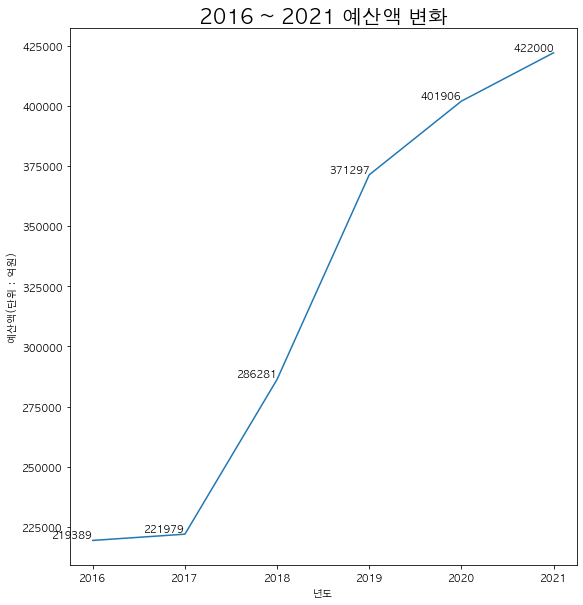

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
file_name = '2016 ~ 2021 예산액 변화'
plt.plot(df.index, df['예산액'])
for i, v in enumerate(df.index):
    plt.text(v, df['예산액'][i], df['예산액'][i],                 
             fontsize = 10, 
             color='black',
             horizontalalignment='right',  
             verticalalignment='bottom') 

plt.tight_layout()
plt.xlabel('년도')
plt.ylabel('예산액(단위 : 억원)')
plt.title(file_name, size = 20)
plt.savefig(file_name  +'.jpg')
plt.show()

In [18]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

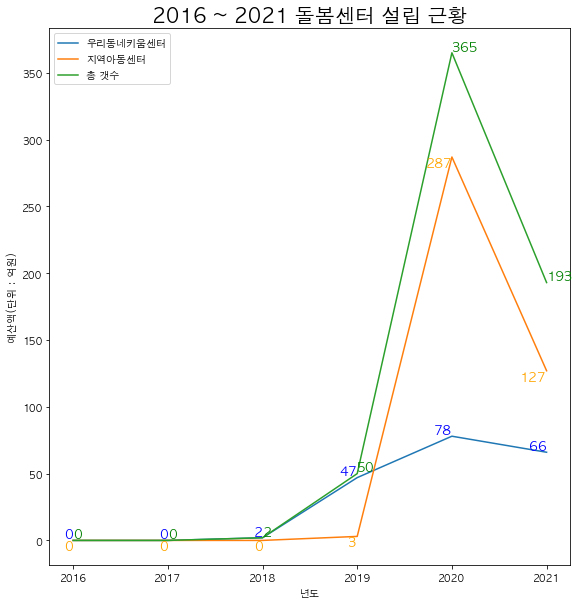

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
file_name = '2016 ~ 2021 돌봄센터 설립 근황'

plt.plot(df.index, df['우리동네키움센터'], label = '우리동네키움센터')

plt.plot(df.index, df['지역아동센터'], label = '지역아동센터')
plt.plot(df.index, df['총 갯수'], label = '총 갯수')

for i, v in enumerate(df.index):
    plt.text(v, df['우리동네키움센터'][i], df['우리동네키움센터'][i],                 
             fontsize = 13, 
             color='blue',
             horizontalalignment='right',  
             verticalalignment='bottom')    
    plt.text(v, df['지역아동센터'][i], df['지역아동센터'][i],                 
             fontsize = 13, 
             color='orange',
             horizontalalignment='right',  # horizontalalignment (left, center, right)
             verticalalignment='top')    # verticalalignment (top, center, bottom)
    plt.text(v, df['총 갯수'][i], df['총 갯수'][i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 13, 
             color='green',
             horizontalalignment='left',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.tight_layout()
plt.xlabel('년도')
plt.ylabel('예산액(단위 : 억원)')
plt.title(file_name, size = 20)
plt.legend()
plt.savefig(file_name  +'.png')
plt.show()

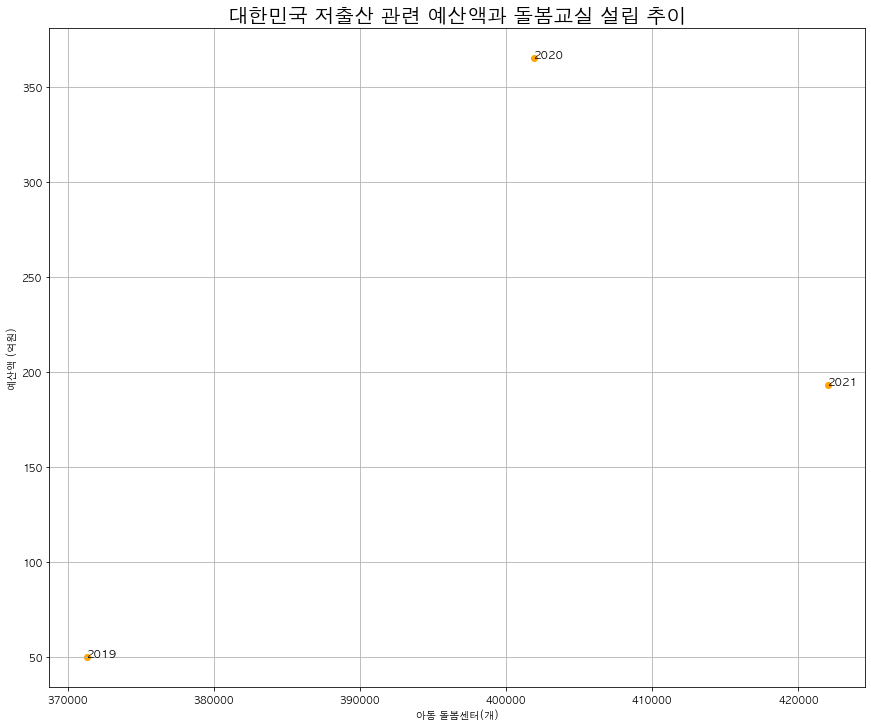

In [31]:
x = list(df['예산액'][3:])
y = list(df['총 갯수'][3:])
fig, ax = plt.subplots(figsize=(12,10))

file_name = '대한민국 저출산 관련 예산액과 돌봄교실 설립 추이'
plt.title(file_name, fontsize=20)

plt.scatter(x, y, color='orange')

for i, label in enumerate(list(result.keys())[3:]):
    plt.text(x[i], y[i], label, fontsize = 11)
    

plt.grid()
plt.tight_layout()
plt.ylabel('예산액 (억원)')
plt.xlabel('아동 돌봄센터(개)')
plt.savefig('result/' + file_name + '.png')
plt.show();

In [25]:
df['예산액'][3:]

2019    371297
2020    401906
2021    422000
Name: 예산액, dtype: int64

In [30]:
list(result.keys())[3:]

['2019', '2020', '2021']

In [34]:
df['예산액']

2016    219389
2017    221979
2018    286281
2019    371297
2020    401906
2021    422000
Name: 예산액, dtype: int64

In [42]:
result1 = {'2016':[219389, 1.17],'2017' : [221979, 1.05], '2018':[286281, 0.98], '2019':[371297, 0.92], 
          '2020':[401906, 0.84], '2021' : [422000, 0.81]}
result1 = pd.DataFrame(result1, index = ['저출산_관련_예산', '출산율'])
result1 = result1.transpose()
result1['저출산_관련_예산']

2016    219389.0
2017    221979.0
2018    286281.0
2019    371297.0
2020    401906.0
2021    422000.0
Name: 저출산_관련_예산, dtype: float64

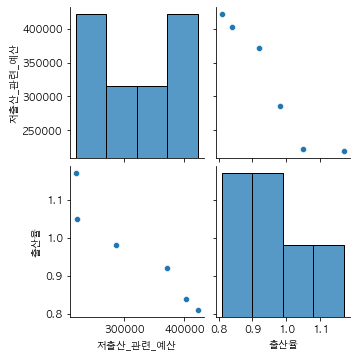

In [43]:
import seaborn as sns
sns.pairplot(result1[['저출산_관련_예산', '출산율']])
plt.show()

In [45]:
import statsmodels.api as sm
model = sm.OLS.from_formula("출산율 ~ 저출산_관련_예산", data=result1)
result1 = model.fit()

In [47]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    출산율   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     37.45
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00361
Time:                        15:08:23   Log-Likelihood:                 11.064
No. Observations:                   6   AIC:                            -18.13
Df Residuals:                       4   BIC:                            -18.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4179      0.077     18.423      0.0

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
